tidyish code for doing yearly output of the cccma analysis

In [146]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [147]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import matplotlib.patches as patches

import netCDF4 as nc
import cmocean as cm
import numpy as np
from salishsea_tools import (
    viz_tools,
)
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow

%matplotlib inline

In [148]:

td = '02dec16'
w = nc.Dataset(f'./CCCma/NCS/{td}_prof.nc')

dp = [0,18,23,26]
for i in range(0,len(dp)):
    print('At depth level ', str(dp[i]), ' depth is ', str(w['Profiles']['depth'][dp[i]]))

At depth level  0  depth is  0.5
At depth level  18  depth is  19.4818
At depth level  23  depth is  44.5177
At depth level  26  depth is  98.063


In [149]:

pt_dict_0 = {'sal_pt' : np.zeros([12,366]), 'temp_pt' : np.zeros([12,366]), 
           'DIC_pt' : np.zeros([12,366]), 'TA_pt' : np.zeros([12,366]),
           'OmA_pt' : np.zeros([12,366]), 'pH_pt' : np.zeros([12,366]),
           'O2_pt' : np.zeros([12,366])}
ptSD_dict_0 = {'sal_sd' : np.zeros([12,366]), 'temp_sd' : np.zeros([12,366]), 
             'DIC_sd' : np.zeros([12,366]), 'TA_sd' : np.zeros([12,366]), 
             'OmA_sd' : np.zeros([12,366]), 'pH_sd' : np.zeros([12,366]),
            'O2_sd' : np.zeros([12,366])}
pt_dict_18 = {'sal_pt' : np.zeros([12,366]), 'temp_pt' : np.zeros([12,366]), 
           'DIC_pt' : np.zeros([12,366]), 'TA_pt' : np.zeros([12,366]),
           'OmA_pt' : np.zeros([12,366]), 'pH_pt' : np.zeros([12,366]),
           'O2_pt' : np.zeros([12,366])}
ptSD_dict_18 = {'sal_sd' : np.zeros([12,366]), 'temp_sd' : np.zeros([12,366]), 
             'DIC_sd' : np.zeros([12,366]), 'TA_sd' : np.zeros([12,366]), 
             'OmA_sd' : np.zeros([12,366]), 'pH_sd' : np.zeros([12,366]),
            'O2_sd' : np.zeros([12,366])}
pt_dict_26 = {'sal_pt' : np.zeros([12,366]), 'temp_pt' : np.zeros([12,366]), 
           'DIC_pt' : np.zeros([12,366]), 'TA_pt' : np.zeros([12,366]),
           'OmA_pt' : np.zeros([12,366]), 'pH_pt' : np.zeros([12,366]),
           'O2_pt' : np.zeros([12,366])}
ptSD_dict_26 = {'sal_sd' : np.zeros([12,366]), 'temp_sd' : np.zeros([12,366]), 
             'DIC_sd' : np.zeros([12,366]), 'TA_sd' : np.zeros([12,366]), 
             'OmA_sd' : np.zeros([12,366]), 'pH_sd' : np.zeros([12,366]),
            'O2_sd' : np.zeros([12,366])}

In [150]:
start = '2016-01-01'
end = '2016-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array = []
for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)
    
date_array = []
for i in range(0,len(arrow_array)):    
    q = arrow_array[i][0]
    ddmmmyy = q.format('DDMMMYY').lower()    
    date_array.append(ddmmmyy)
    
#print(date_array)
fx = 13
fy = 25

In [151]:
for d in range(0,len(date_array)):
    td = date_array[d]
    w = nc.Dataset(f'./CCCma/NCS/{td}_prof.nc')
    if d%30 == 0:
        print(td)
    
    sa = w['Profiles']
    vars = ['sal','temp','DIC','TA','OmA','pH','O2']

    for i in range(0,len(vars)):
        tv = vars[i]
        vp = f'{tv}_prof'
        vsd = f'{tv}_profSD'


        pt0 = sa[vp][:,0]
        sd0 = sa[vsd][:,0]
        pt18 = sa[vp][:,18]
        sd18 = sa[vsd][:,18]
        pt26 = sa[vp][:,26]
        sd26 = sa[vsd][:,26]

        pt_key = f'{tv}_pt'
        sd_key = f'{tv}_sd'

        pt_dict_0[pt_key][:,d] = pt0
        ptSD_dict_0[sd_key][:,d] = sd0 
        pt_dict_18[pt_key][:,d] = pt18
        ptSD_dict_18[sd_key][:,d] = sd18 
        pt_dict_26[pt_key][:,d] = pt26
        ptSD_dict_26[sd_key][:,d] = sd26 
    

01jan16
31jan16
01mar16
31mar16
30apr16
30may16
29jun16
29jul16
28aug16
27sep16
27oct16
26nov16
26dec16


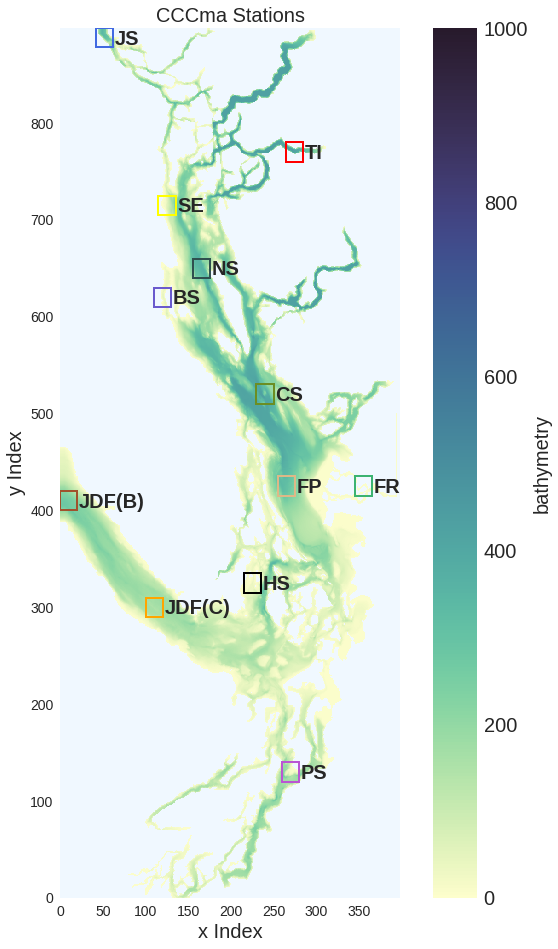

In [152]:
bath = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']

CCCma.one_panel_plot(bath1, cs.STATIONS, 'CCCma Stations', \
               cm.cm.deep,12,16,0,1000,'bathymetry','')

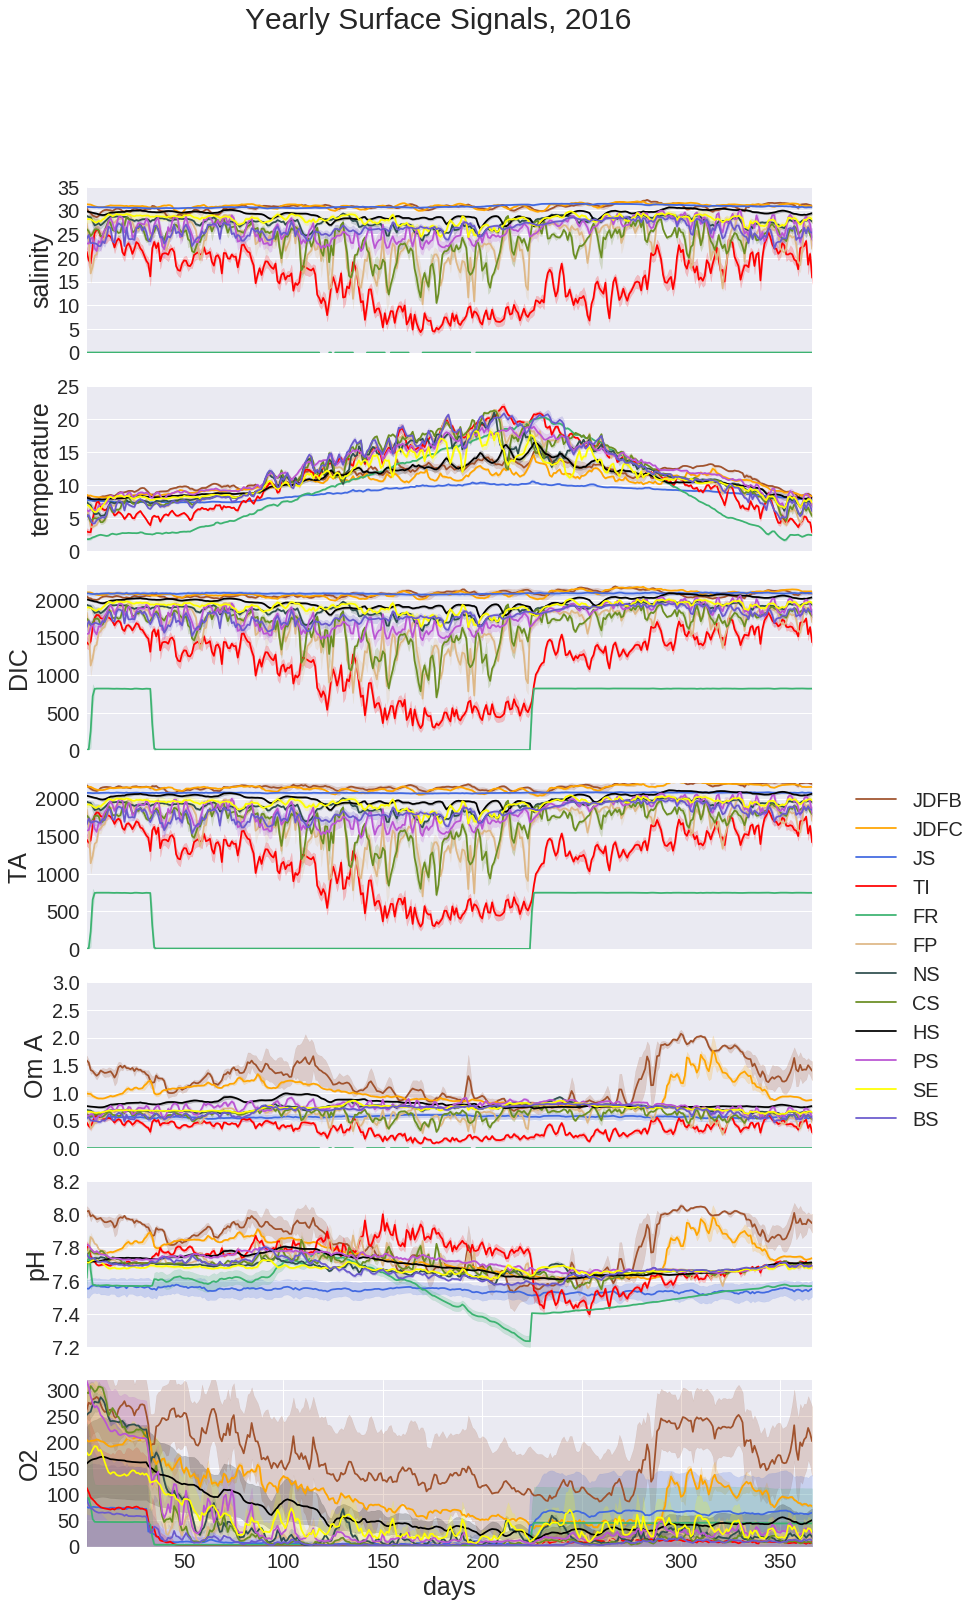

In [153]:
#['sal','temp','DIC','TA','OmA','pH','O2']


pt = ['sal_pt', 'temp_pt' , 'DIC_pt' , 'TA_pt' ,'OmA_pt' , 'pH_pt' , 'O2_pt' ]
sd = ['sal_sd', 'temp_sd' , 'DIC_sd' , 'TA_sd' ,'OmA_sd' , 'pH_sd' , 'O2_sd' ]
yl = ['salinity', 'temperature' , 'DIC' , 'TA' ,'Om A' , 'pH' , 'O2' ]
ymin = [0,0,0,0,0,7.2,0]
ymax = [35,25,2200,2200,3,8.2,320]
stns = ['JDFB','JDFC','JS','TI','FR','FP','NS','CS','HS','PS','SE','BS']
for c in range(0,len(cs.STATIONS)):
    stn = stns[c]
    #print(cs.STATIONS[stn]['color'])
    
t = np.arange(1,367,1)

fig = plt.figure(figsize=(fx,fy))

for i in range(1,8):
    ax = fig.add_subplot(7,1,i)
    
    for s in range(0,12):
        stn = stns[s]
        pattern = pt_dict_0[pt[i-1]][s,:]
        st_dev = ptSD_dict_0[sd[i-1]][s,:]
        ax.plot(t, pattern, color = cs.STATIONS[stn]['color'] )
        ax.fill_between(t,pattern+st_dev,pattern-st_dev, color = cs.STATIONS[stn]['color'], alpha = 0.2)
        
        
    ax.set_xlim([1,366])
    ax.set_ylabel(yl[i-1],fontsize = '25')
    ax.set_ylim([ymin[i-1],ymax[i-1]])
    plt.yticks(fontsize=20, rotation=0)
    if i != 7:
        ax.set_xticks([], [])
    if i == 4:
        ax.legend(stns , fontsize = 20, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if i == 7:
        plt.xticks(fontsize=20, rotation=0)
        ax.set_xlabel('days', fontsize = '25')

plt.suptitle('Yearly Surface Signals, 2016', fontsize = 30)

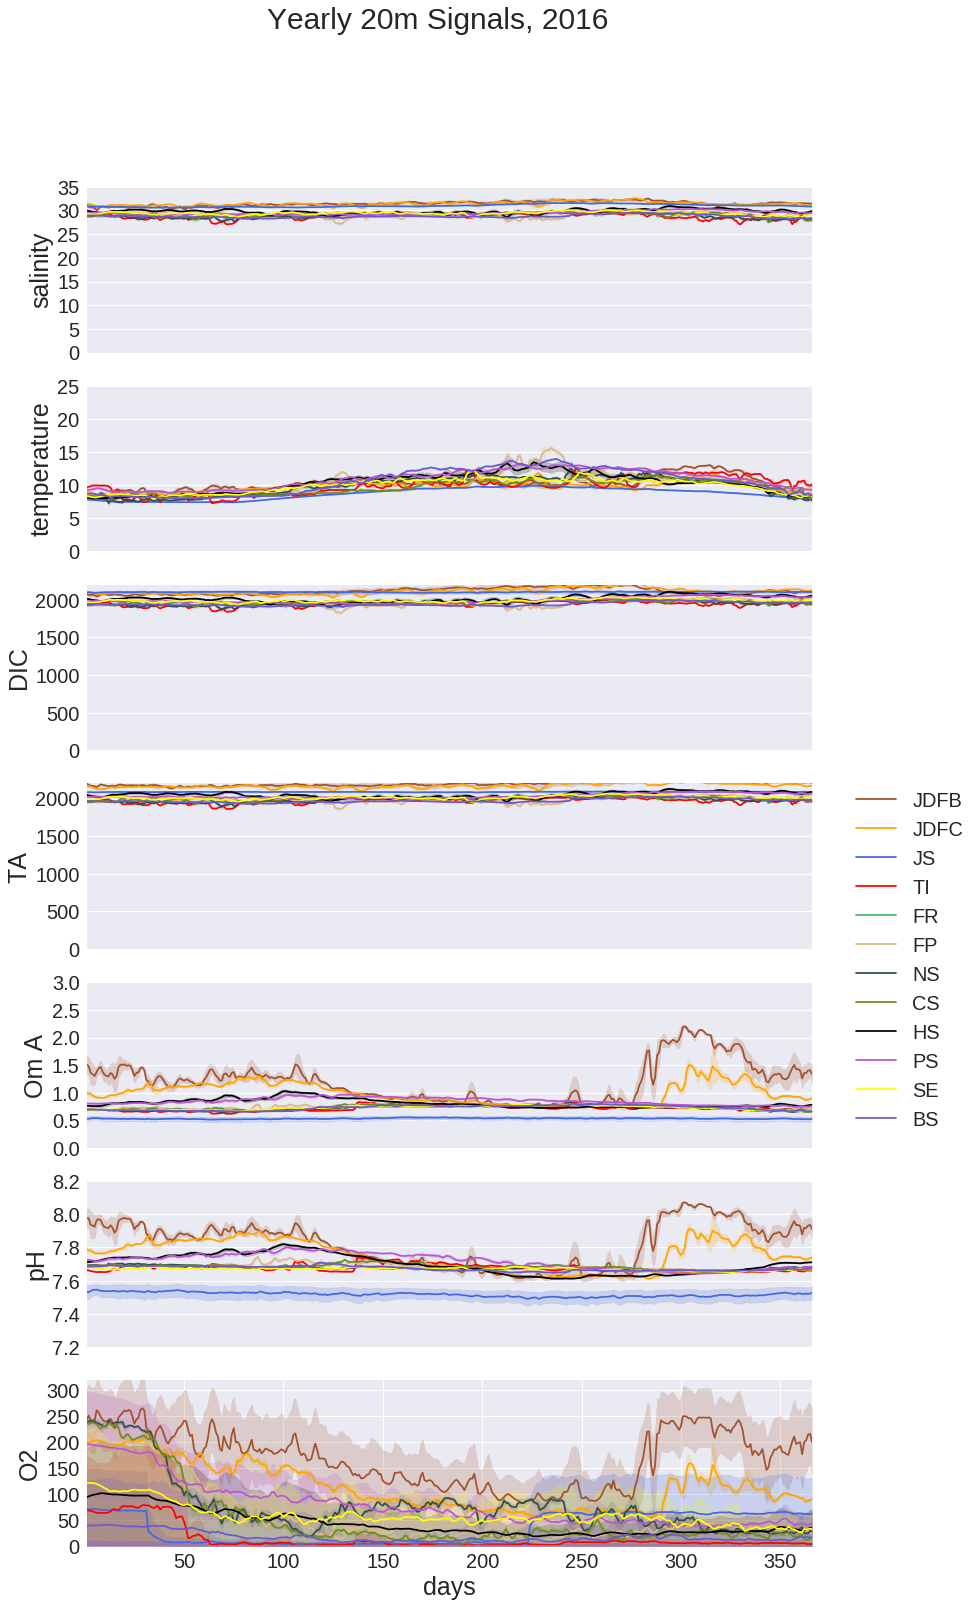

In [154]:

for c in range(0,len(cs.STATIONS)):
    stn = stns[c]
    #print(cs.STATIONS[stn]['color'])
    
t = np.arange(1,367,1)

fig = plt.figure(figsize=(fx,fy))

for i in range(1,8):
    ax = fig.add_subplot(7,1,i)
    
    for s in range(0,12):
        stn = stns[s]
        pattern = pt_dict_18[pt[i-1]][s,:]
        st_dev = ptSD_dict_18[sd[i-1]][s,:]
        ax.plot(t, pattern, color = cs.STATIONS[stn]['color'] )
        ax.fill_between(t,pattern+st_dev,pattern-st_dev, color = cs.STATIONS[stn]['color'], alpha = 0.2)

    ax.set_xlim([1,366])
    ax.set_ylabel(yl[i-1],fontsize = '25')
    ax.set_ylim([ymin[i-1],ymax[i-1]])
    plt.yticks(fontsize=20, rotation=0)
    if i != 7:
        ax.set_xticks([], [])
    if i == 4:
        ax.legend(stns , fontsize = 20, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if i == 7:
        plt.xticks(fontsize=20, rotation=0)
        ax.set_xlabel('days', fontsize = '25')

plt.suptitle('Yearly 20m Signals, 2016', fontsize = 30)

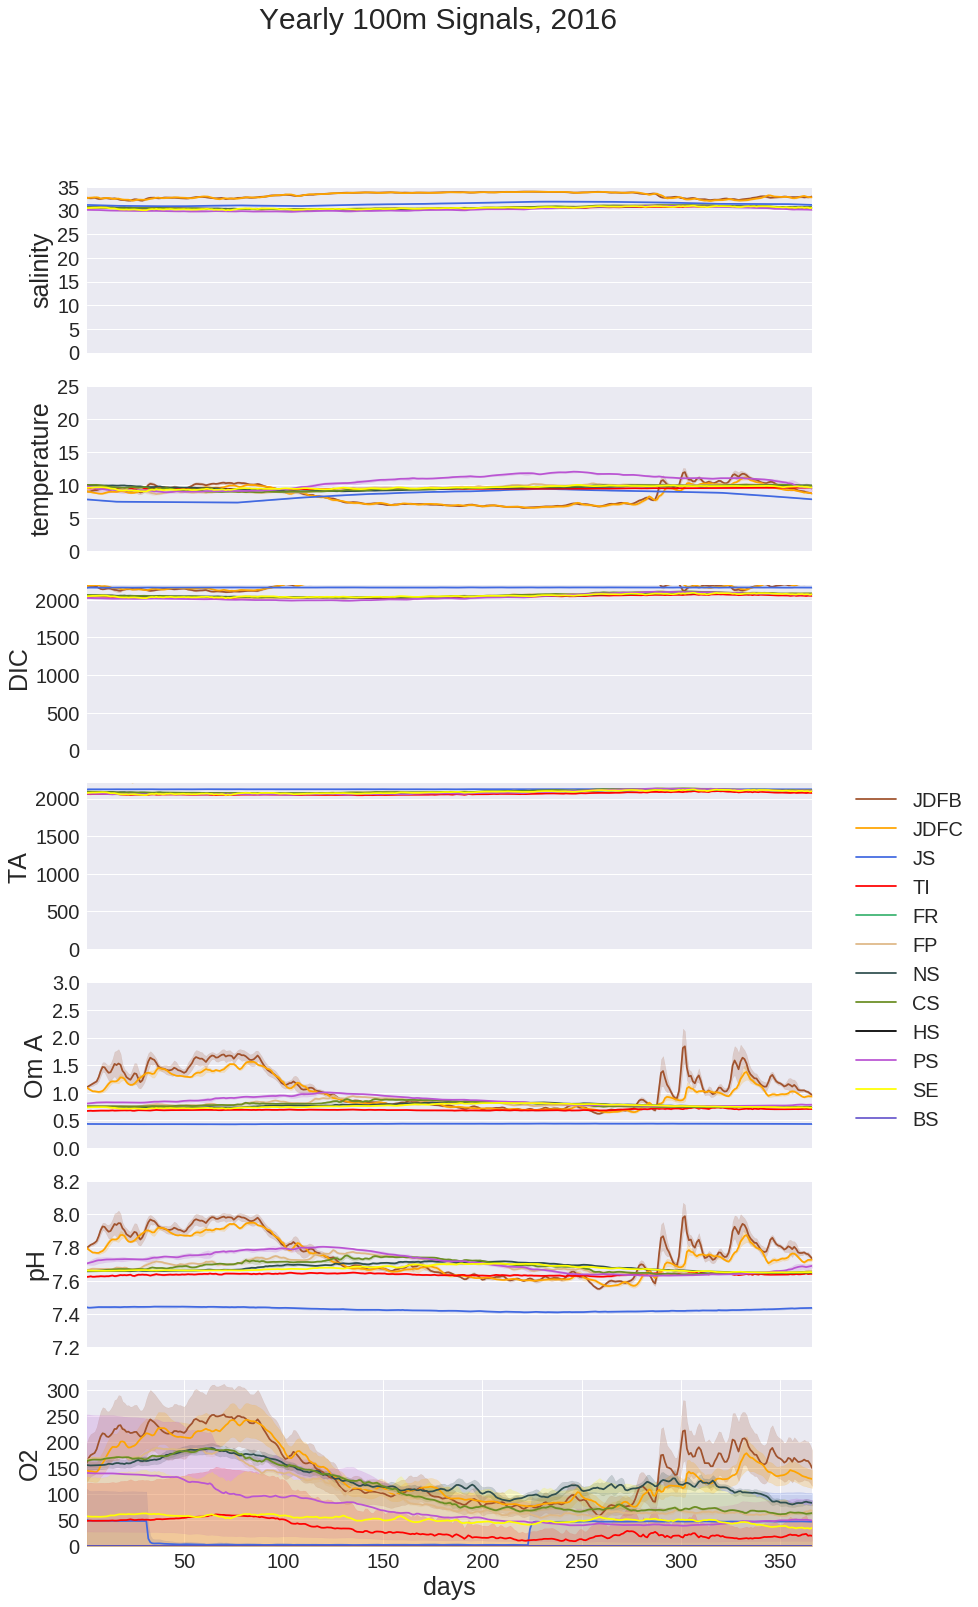

In [155]:
for c in range(0,len(cs.STATIONS)):
    stn = stns[c]
    #print(cs.STATIONS[stn]['color'])
    
t = np.arange(1,367,1)

fig = plt.figure(figsize=(fx,fy))

for i in range(1,8):
    ax = fig.add_subplot(7,1,i)
    
    for s in range(0,12):
        stn = stns[s]
        pattern = pt_dict_26[pt[i-1]][s,:]
        st_dev = ptSD_dict_26[sd[i-1]][s,:]
        ax.plot(t, pattern, color = cs.STATIONS[stn]['color'] )
        ax.fill_between(t,pattern+st_dev,pattern-st_dev, color = cs.STATIONS[stn]['color'], alpha = 0.2)
              
    ax.set_xlim([1,366])
    ax.set_ylabel(yl[i-1],fontsize = '25')
    ax.set_ylim([ymin[i-1],ymax[i-1]])
    plt.yticks(fontsize=20, rotation=0)
    if i != 7:
        ax.set_xticks([], [])
    if i == 4:
        ax.legend(stns , fontsize = 20, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if i == 7:
        plt.xticks(fontsize=20, rotation=0)
        ax.set_xlabel('days', fontsize = '25')

plt.suptitle('Yearly 100m Signals, 2016', fontsize = 30)